# Import The Libraries

In [1]:
# ===============================
# 📌 1) Import All Needed Libraries
# ===============================

# Basic & Essential
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Saving model
import joblib

# Settings for visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")


# Read The Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")

print("Path to dataset files:", path)

import os
os.listdir(path)

file_path = f"{path}/MentalHealthSurvey.csv"
df = pd.read_csv(file_path)
df.head()



100%|██████████| 1.98k/1.98k [00:00<00:00, 3.71MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdullahashfaqvirk/student-mental-health-survey/versions/1


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [3]:
df.shape


(87, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [5]:
df.describe()


,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Check if there is missing valus

In [6]:
df.isnull().sum()


,0
gender,0
age,0
university,0
degree_level,0
degree_major,0
academic_year,0
cgpa,0
residential_status,0
campus_discrimination,0
sports_engagement,0


# Check if there is duplicates

In [7]:

df.duplicated().sum()


np.int64(0)

# Cleaning Columns

In [8]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)
df.columns


Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

# Gender Distribution

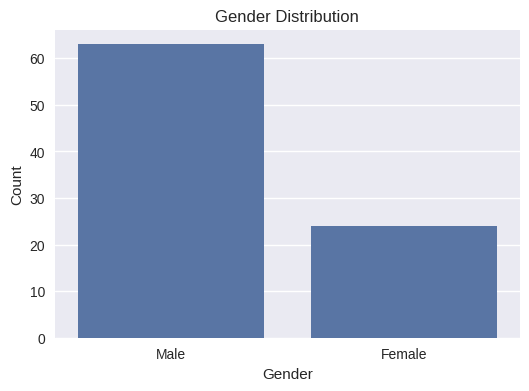

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# Age Distribution

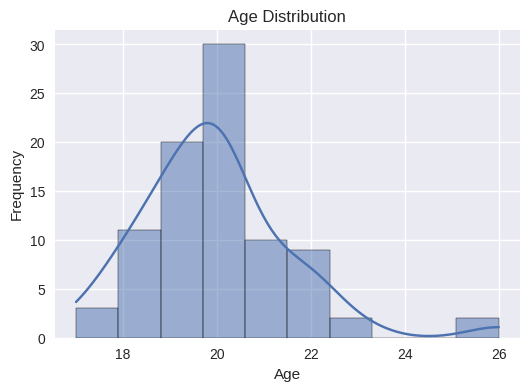

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# CGPA Distribution


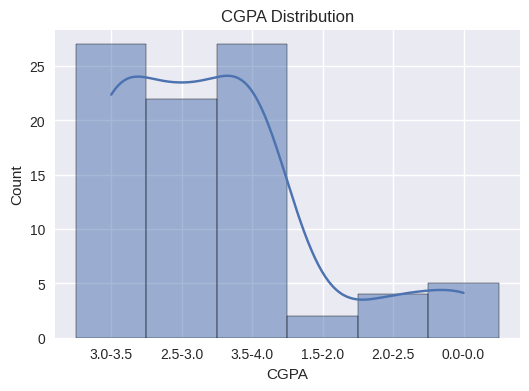

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["cgpa"], kde=True)
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()


# Average Sleep

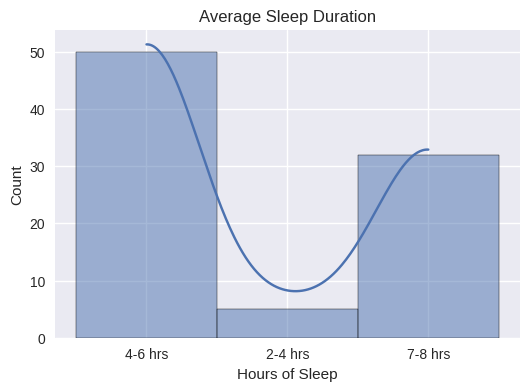

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["average_sleep"], kde=True)
plt.title("Average Sleep Duration")
plt.xlabel("Hours of Sleep")
plt.ylabel("Count")
plt.show()


# Depression by Gender

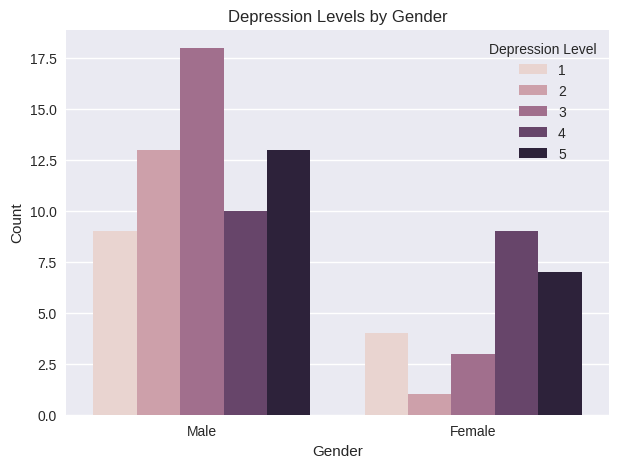

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x="gender", hue="depression", data=df)
plt.title("Depression Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Depression Level")
plt.show()



# Anxiety vs Academic Pressure

/tmp/ipython-input-2796832740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="academic_pressure", y="anxiety", data=df, ci=None)


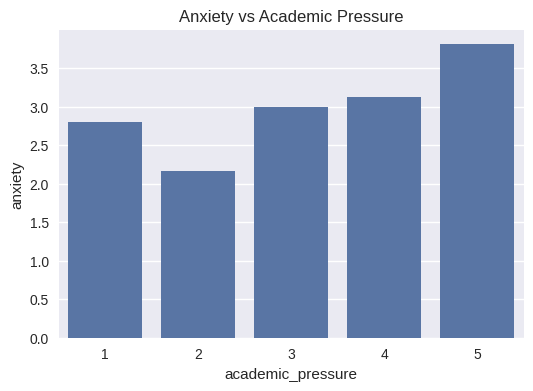

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x="academic_pressure", y="anxiety", data=df, ci=None)
plt.title("Anxiety vs Academic Pressure")
plt.show()





# Anxiety vs Sleep

/tmp/ipython-input-2529874108.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="anxiety", y="average_sleep", data=df, ci=None)


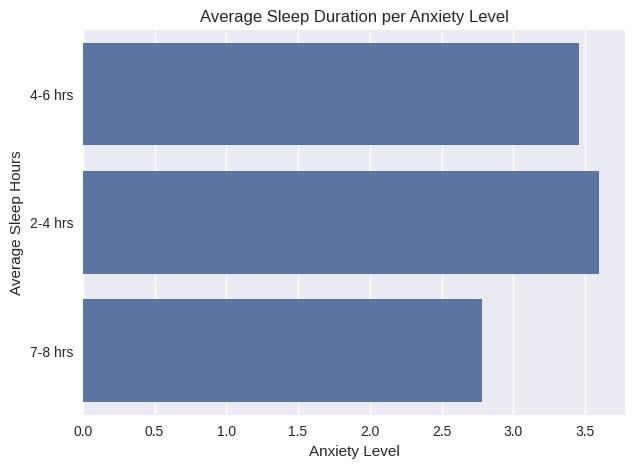

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x="anxiety", y="average_sleep", data=df, ci=None)
plt.title("Average Sleep Duration per Anxiety Level")
plt.xlabel("Anxiety Level")
plt.ylabel("Average Sleep Hours")
plt.show()



# Academic Year vs Anxiety

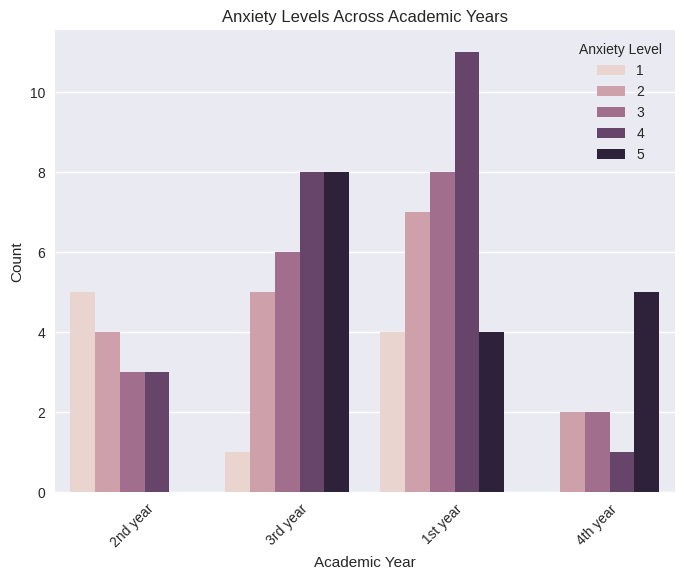

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="academic_year", hue="anxiety")
plt.title("Anxiety Levels Across Academic Years")
plt.xlabel("Academic Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Anxiety Level")
plt.show()



# Study Satisfaction Distribution

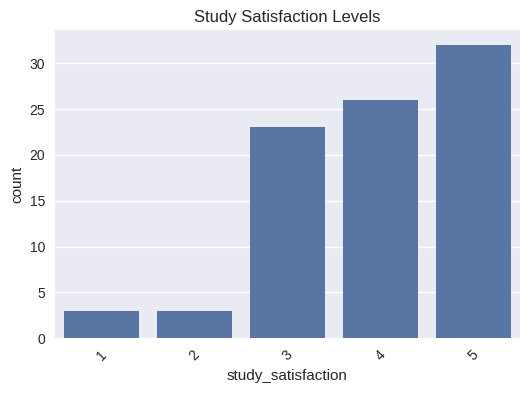

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="study_satisfaction")
plt.title("Study Satisfaction Levels")
plt.xticks(rotation=45)
plt.show()


# Academic Workload vs Anxiety

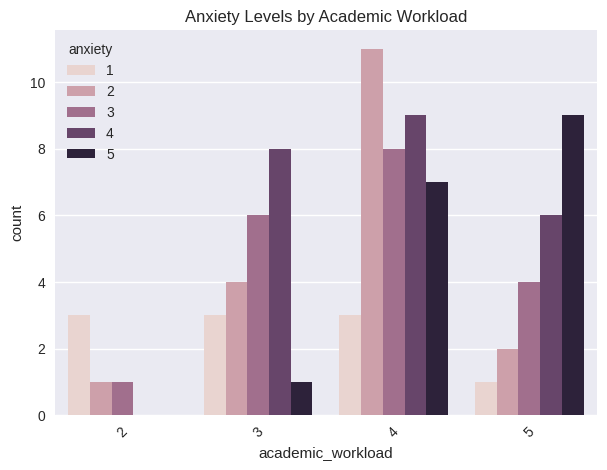

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x="academic_workload", hue="anxiety", data=df)
plt.title("Anxiety Levels by Academic Workload")
plt.xticks(rotation=45)
plt.show()


# Financial Concerns vs Anxiety

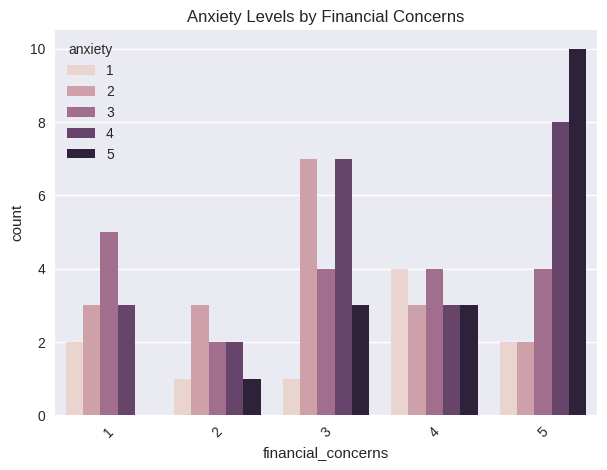

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x="financial_concerns", hue="anxiety", data=df)
plt.title("Anxiety Levels by Financial Concerns")
plt.xticks(rotation=45)
plt.show()


# Campus Discrimination vs Anxiety

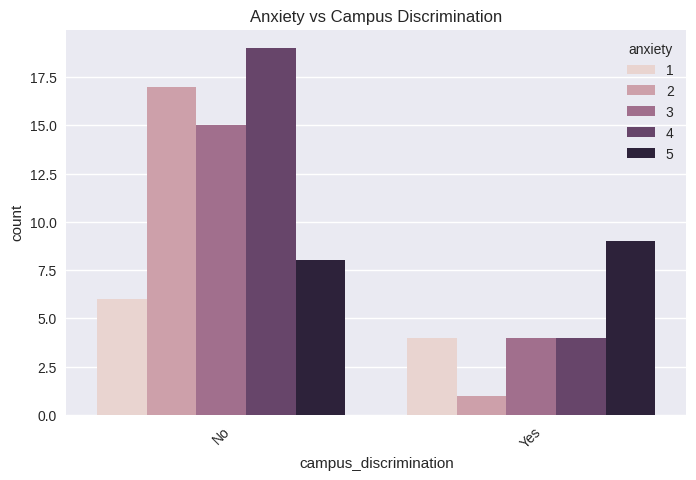

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x="campus_discrimination", hue="anxiety", data=df)
plt.title("Anxiety vs Campus Discrimination")
plt.xticks(rotation=45)
plt.show()


# Outliers in Ages

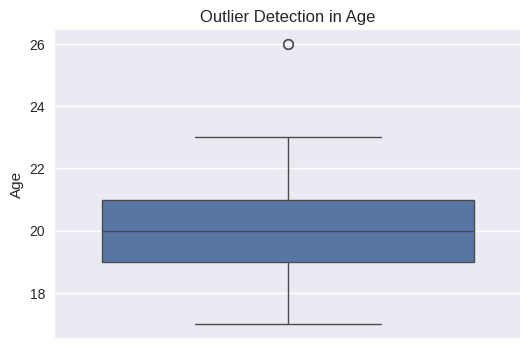

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["age"])
plt.title("Outlier Detection in Age")
plt.ylabel("Age")
plt.show()


# Relationship Between Sleep Duration and Academic Performance by Anxiety Level

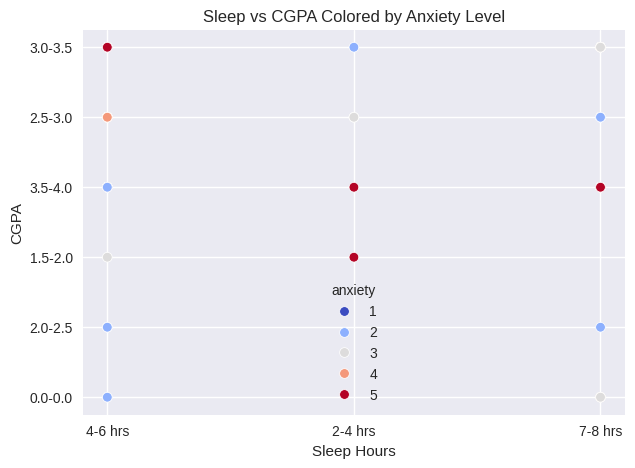

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="average_sleep",
    y="cgpa",
    hue="anxiety",
    data=df,
    palette="coolwarm"
)
plt.title("Sleep vs CGPA Colored by Anxiety Level")
plt.xlabel("Sleep Hours")
plt.ylabel("CGPA")
plt.show()


# Correlation

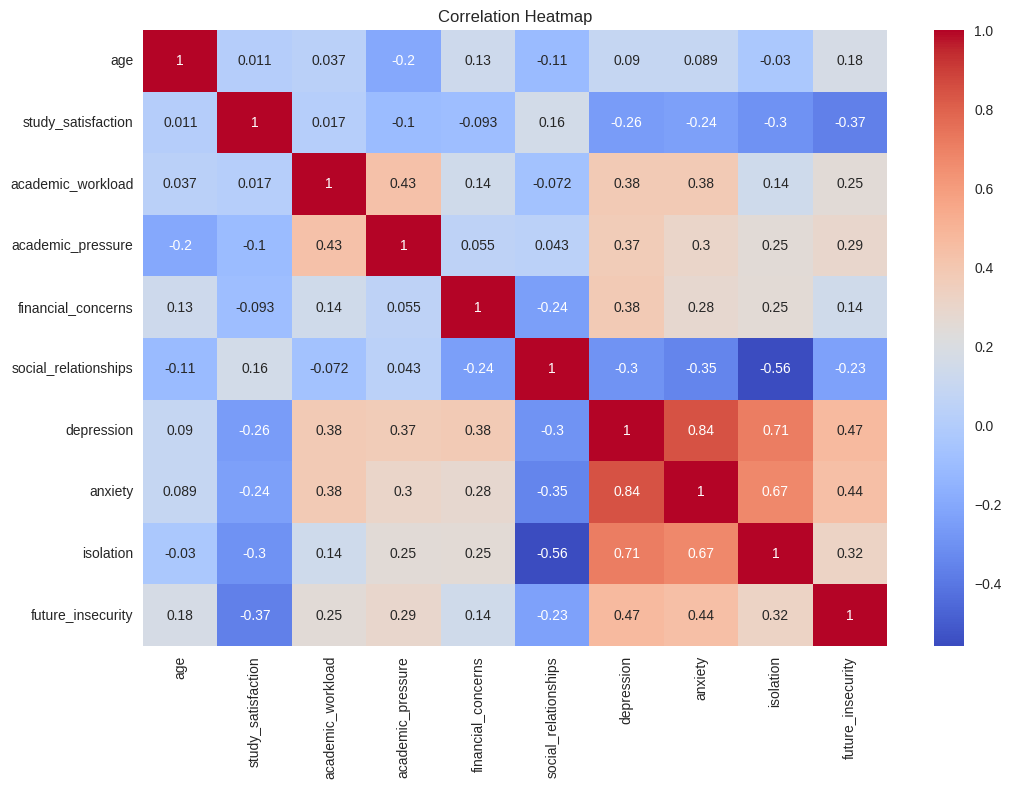

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [24]:


def simplify_anxiety(x):
    if x in [1, 2]:
        return "Low"
    elif x == 3:
        return "Moderate"
    else:
        return "High"

df["anxiety_simplified"] = df["anxiety"].apply(simplify_anxiety)


df["anxiety_simplified"].value_counts()


,count
anxiety_simplified,
High,40
Low,28
Moderate,19


# Build and Train the Machine Learning Model

In [25]:


target_col = "anxiety_simplified"

y_raw = df[target_col]
X = df.drop(columns=[target_col])

print("y_raw shape:", y_raw.shape)
print("X shape:", X.shape)
X.head()


y_raw shape: (87,)
X shape: (87, 21)


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [26]:


X = df.drop(columns=["anxiety_simplified", "anxiety"])

print("y_raw shape:", y_raw.shape)
print("X shape:", X.shape)
X.head()


y_raw shape: (87,)
X shape: (87, 20)


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,4-6 hrs,5,4,5,4,3,2,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,4-6 hrs,5,4,4,1,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,2-4 hrs,5,5,5,3,4,2,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,4-6 hrs,3,5,4,4,1,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,4-6 hrs,3,5,5,2,3,5,4,4,Online Entertainment


In [27]:
le_target = LabelEncoder()
y = le_target.fit_transform(y_raw)

print("Original classes:", le_target.classes_)
print("Encoded values:", np.unique(y))

Original classes: ['High' 'Low' 'Moderate']
Encoded values: [0 1 2]


In [28]:


num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)



Numeric columns: ['age', 'study_satisfaction', 'academic_workload', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'isolation', 'future_insecurity']
Categorical columns: ['gender', 'university', 'degree_level', 'degree_major', 'academic_year', 'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement', 'average_sleep', 'stress_relief_activities']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (69, 20)
X_test: (18, 20)
y_train: (69,)
y_test: (18,)


In [30]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [31]:
clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', clf)
])

In [32]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'study_satisfaction',
                                                   'academic_workload',
                                                   'academic_pressure',
                                                   'financial_concerns',
                                                   'social_relationships',
                                                   'depression', 'isolation',
                                                   'future_insecurity']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'university',
                                                   'degree_level',
                                                   'degree_major',
                                                   'academic_year', 'cgpa',
                                                   'residential_status',
                                                   'campus_discrimination',
                                                   'sports_engagement',
                                                   'average_sleep',
                                                   'stress_relief_activities'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=2, n_estimators=400,
                                        random_state=42))])

Accuracy: 0.5555555555555556

Classification Report:

              precision    recall  f1-score   support

        High       0.73      1.00      0.84         8
         Low       0.67      0.33      0.44         6
    Moderate       0.00      0.00      0.00         4

    accuracy                           0.56        18
   macro avg       0.46      0.44      0.43        18
weighted avg       0.55      0.56      0.52        18



<Figure size 400x400 with 0 Axes>

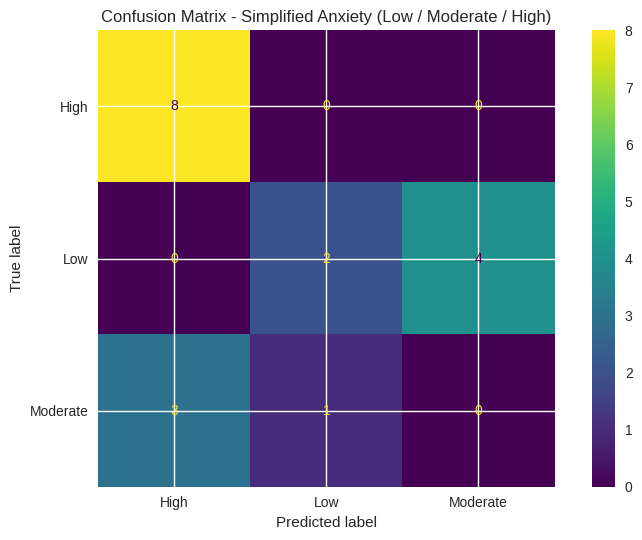

In [33]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")

target_names = [str(c) for c in le_target.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(4,4))
ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test,
    display_labels=target_names
)
plt.title("Confusion Matrix - Simplified Anxiety (Low / Moderate / High)")
plt.tight_layout()
plt.show()

In [35]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostClassifier


cat_features_index = [X.columns.get_loc(col) for col in cat_cols]

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=False
)

cat_model.fit(
    X_train, y_train,
    cat_features=cat_features_index,
    eval_set=(X_test, y_test),
    verbose=False
)


y_pred_cat = cat_model.predict(X_test).flatten()


print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_cat, target_names=le_target.classes_))


Accuracy: 0.6111111111111112

Classification Report:

              precision    recall  f1-score   support

        High       0.57      1.00      0.73         8
         Low       0.75      0.50      0.60         6
    Moderate       0.00      0.00      0.00         4

    accuracy                           0.61        18
   macro avg       0.44      0.50      0.44        18
weighted avg       0.50      0.61      0.52        18



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
results = X_test.copy()
results["true_anxiety"] = le_target.inverse_transform(y_test)
results["predicted_anxiety"] = le_target.inverse_transform(y_pred)
results.head(10)


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,isolation,future_insecurity,stress_relief_activities,true_anxiety,predicted_anxiety
42,Male,18,PU,Undergraduate,Data Science,1st year,3.5-4.0,Off-Campus,Yes,1-3 times,...,3,3,2,3,3,3,4,Online Entertainment,Moderate,High
38,Female,18,PU,Undergraduate,Data Science,1st year,2.5-3.0,Off-Campus,No,No Sports,...,4,5,5,2,5,5,5,Creative Outlets,High,High
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,5,5,5,1,5,5,5,"Religious Activities, Sleep",High,High
58,Male,20,PU,Undergraduate,Data Science,2nd year,3.5-4.0,Off-Campus,No,4-6 times,...,2,2,1,3,1,1,1,"Religious Activities, Social Connections",Low,Low
35,Male,18,PU,Undergraduate,Computer Science,1st year,3.5-4.0,Off-Campus,No,7+ times,...,3,4,5,2,4,4,5,"Religious Activities, Sports and Fitness, Soci...",Moderate,High
16,Female,20,PU,Undergraduate,Data Science,1st year,3.0-3.5,Off-Campus,No,No Sports,...,4,4,3,1,3,3,1,Social Connections,Low,Moderate
21,Female,19,PU,Undergraduate,Data Science,1st year,3.0-3.5,Off-Campus,Yes,No Sports,...,5,5,2,2,4,5,5,"Religious Activities, Social Connections",High,High
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,3,4,2,3,1,"Religious Activities, Sports and Fitness, Onli...",Moderate,Low
76,Female,19,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,Yes,No Sports,...,5,5,5,3,4,3,4,"Social Connections, Sleep",Moderate,High
46,Male,21,PU,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,1-3 times,...,4,5,4,3,5,5,5,"Religious Activities, Sports and Fitness, Crea...",High,High


In [38]:


os.listdir()


['.config', 'catboost_info', 'sample_data']

In [41]:
df.to_csv("clean_data.csv", index=False)
print("clean_data.csv saved!")


clean_data.csv saved!


In [43]:
os.listdir()

['.config',
 'anxiety_catboost_model.joblib',
 'anxiety_label_encoder.joblib',
 'catboost_info',
 'clean_data.csv',
 'sample_data']

In [44]:
cat_model


In [45]:
import joblib

joblib.dump(cat_model, "anxiety_catboost_model.joblib")
joblib.dump(le_target, "anxiety_label_encoder.joblib")

print("Model and encoder saved!")


Model and encoder saved!


In [46]:
os.listdir()

['.config',
 'anxiety_catboost_model.joblib',
 'anxiety_label_encoder.joblib',
 'catboost_info',
 'clean_data.csv',
 'sample_data']

In [47]:
!pip install imbalanced-learn


In [48]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model_smote = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", smote),
    ("classifier", clf)
])


In [50]:
model_smote.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'study_satisfaction',
                                                   'academic_workload',
                                                   'academic_pressure',
                                                   'financial_concerns',
                                                   'social_relationships',
                                                   'depression', 'isolation',
                                                   'future_insecurity']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'university',
                                                   'degree_level',
                                                   'degree_major',
                                                   'academic_year', 'cgpa',
                                                   'residential_status',
                                                   'campus_discrimination',
                                                   'sports_engagement',
                                                   'average_sleep',
                                                   'stress_relief_activities'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

Accuracy with SMOTE: 0.6111111111111112

Classification Report (with SMOTE):

              precision    recall  f1-score   support

        High       0.67      1.00      0.80         8
         Low       0.75      0.50      0.60         6
    Moderate       0.00      0.00      0.00         4

    accuracy                           0.61        18
   macro avg       0.47      0.50      0.47        18
weighted avg       0.55      0.61      0.56        18



<Figure size 400x400 with 0 Axes>

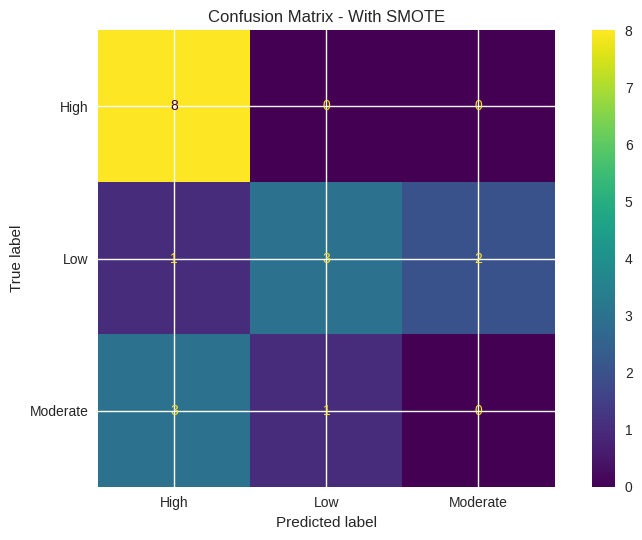

In [51]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_smote = model_smote.predict(X_test)

print("Accuracy with SMOTE:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report (with SMOTE):\n")
target_names = [str(c) for c in le_target.classes_]
print(classification_report(y_test, y_pred_smote, target_names=target_names))

plt.figure(figsize=(4, 4))
ConfusionMatrixDisplay.from_estimator(
    model_smote, X_test, y_test, display_labels=target_names
)
plt.title("Confusion Matrix - With SMOTE")
plt.tight_layout()
plt.show()
